In [ ]:
library(tidyverse)
library(ggthemes)

In [2]:
housing_MHI <- read.csv("housing_MHI_merge.csv")
housing_MHI$Month <- as.POSIXct(housing_MHI$Month)

In [3]:
ratio <- ggplot(housing_MHI, aes(x = Month, y = housing_MHI_ratio, color = county))+
    geom_line(size = 1.5, alpha = 0.6)+
    theme_tufte()+
    scale_color_tableau()+
    theme()

In [4]:
house <- ggplot(housing_MHI, aes(x = Month, y = houseprice, color = county))+
    geom_line(size = 1.5, alpha = 0.6)+
    theme_tufte()+
    scale_color_tableau()+
    theme()

In [5]:
income <- ggplot(housing_MHI, aes(x = Month, y = MHI, color = county))+
    geom_line(size = 1.5, alpha = 0.6)+
    theme_tufte()+
    scale_color_tableau()+
    theme()

In [6]:
housingdatalong <- gather(housing_MHI, key="measure", value="value", c("MHI", "houseprice", "housing_MHI_ratio"))

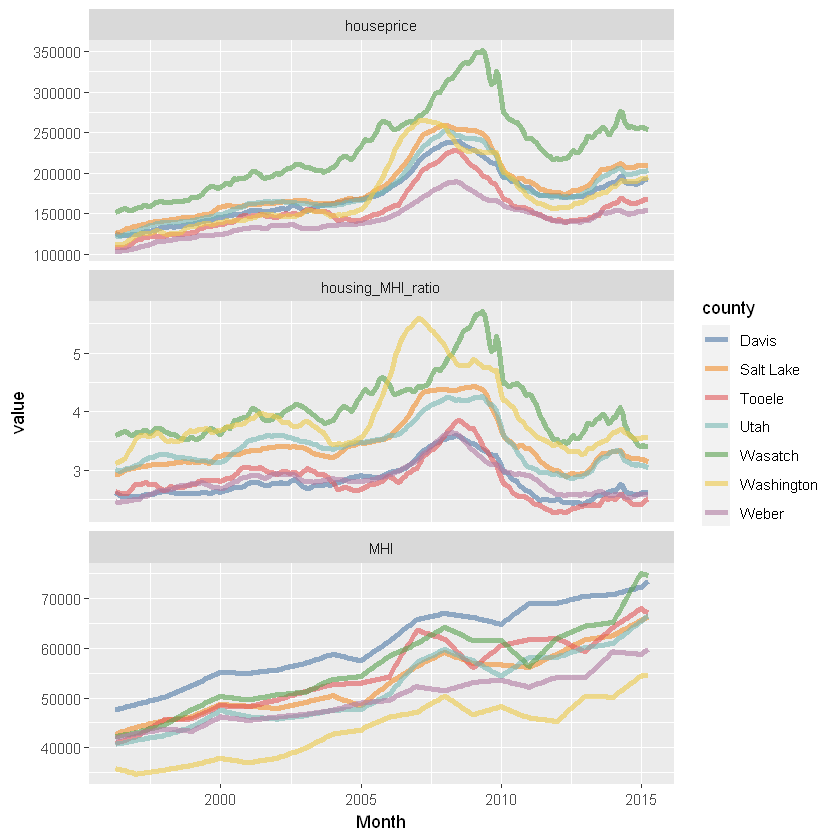

In [7]:
ggplot(housingdatalong, aes(x=Month, y=value, color = county))+
  geom_line(stat = "identity", size = 1.5, alpha = 0.6)+
  facet_wrap(~measure, ncol = 1, scales = "free_y")+
    scale_color_tableau()

In [8]:
#import the melted version of housing_MHI
housing_MHI_melt <- read.csv("housing_MHI_melt.csv")
housing_MHI_melt$Month <- as.POSIXct(housing_MHI_melt$Month)

In [9]:
#set the order of the variable factors
housing_MHI_melt$var_f = factor(housing_MHI_melt$variable, levels=c('houseprice','MHI','housing_MHI_ratio'))

#create a label dict for facet names
f_labels <- c(
    "houseprice" = "\n Median 3 Bedroom Home Price ($)",
    "MHI" = "\n Median Household Income ($)",
    "housing_MHI_ratio" = "\n Median Home Price to Income Ratio"
)

In [10]:
#plot the data using the melted frame
housing_MHI_facet <- ggplot(housing_MHI_melt, aes(x=Month, y = value, color = county))+
    geom_line(stat = "identity", size = 1.5, alpha = 0.6)+
    facet_wrap(~var_f, ncol = 1, scales = "free_y", labeller = as_labeller(f_labels))+
    labs(title = "Income and Home Prices in Utah's Largest Counties \n",
        color = "County")+
    theme_fivethirtyeight()+
    scale_x_datetime(date_breaks = "2 years", date_labels = "%Y")+
    theme(strip.text.x = element_text(size = 14, face = "bold"),
         plot.title = element_text(hjust = 0.5))+
    scale_color_tableau()

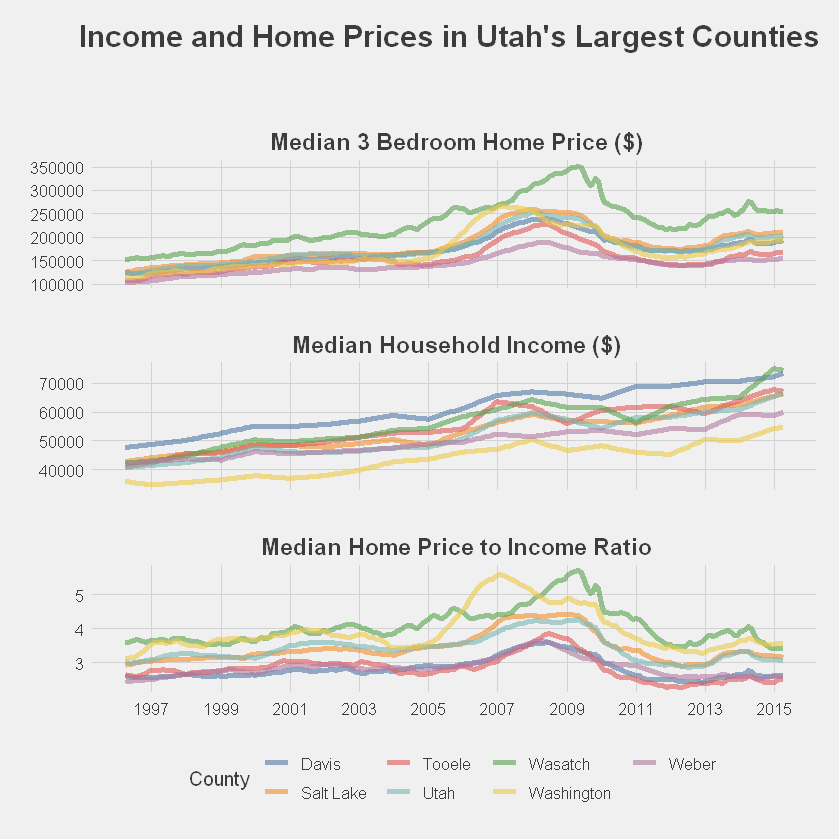

In [11]:
housing_MHI_facet

In [12]:
ggsave("housing_MHI_facet.png", width = 10, height = 10, units = "in")